In [53]:
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import glob
import pathlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [23]:
data_dir_cat = './Cat'
data_dir_dog = './Dog'
img_size =(128,128)

In [ ]:
# a = os.listdir(data_dir_cat)    
b=[os.path.join(data_dir_cat,img) for img in os.listdir(data_dir_cat)]
b                                              

In [24]:
pet_images_dict = {
    'cats':[os.path.join(data_dir_cat,img) for img in os.listdir(data_dir_cat)] ,
    'dogs': [os.path.join(data_dir_dog,img) for img in os.listdir(data_dir_dog)],
}
os.listdir(data_dir_cat)
pet_labels_dict = {
    'cats': 0,
    'dogs': 1,
}

In [25]:
pet_images_dict.items()
# a = [os.path.join(data_dir_cat,img) for img in pet_images_dict['cats']]

dict_items([('cats', ['./Cat\\0.jpg', './Cat\\1.jpg', './Cat\\10.jpg', './Cat\\100.jpg', './Cat\\1000.jpg', './Cat\\10000.jpg', './Cat\\10001.jpg', './Cat\\10002.jpg', './Cat\\10003.jpg', './Cat\\10004.jpg', './Cat\\10005.jpg', './Cat\\10006.jpg', './Cat\\10007.jpg', './Cat\\10008.jpg', './Cat\\10009.jpg', './Cat\\1001.jpg', './Cat\\10010.jpg', './Cat\\10011.jpg', './Cat\\10012.jpg', './Cat\\10013.jpg', './Cat\\10014.jpg', './Cat\\10015.jpg', './Cat\\10016.jpg', './Cat\\10017.jpg', './Cat\\10018.jpg', './Cat\\10019.jpg', './Cat\\1002.jpg', './Cat\\10020.jpg', './Cat\\10021.jpg', './Cat\\10022.jpg', './Cat\\10023.jpg', './Cat\\10024.jpg', './Cat\\10025.jpg', './Cat\\10026.jpg', './Cat\\10027.jpg', './Cat\\10028.jpg', './Cat\\10029.jpg', './Cat\\1003.jpg', './Cat\\10030.jpg', './Cat\\10031.jpg', './Cat\\10032.jpg', './Cat\\10033.jpg', './Cat\\10034.jpg', './Cat\\10035.jpg', './Cat\\10036.jpg', './Cat\\10037.jpg', './Cat\\10038.jpg', './Cat\\10039.jpg', './Cat\\1004.jpg', './Cat\\10040.jp

In [67]:
a=[]
for label, class_dir in pet_images_dict.items():
    for class_dir in class_dir:
        img = cv2.imread(class_dir)
        a.append(img)

In [ ]:
pet_images_dict.shape()

In [37]:

for label, class_dir in pet_images_dict.items():
            print(label)
            for class_dir in class_dir:
                    print(class_dir)
                    

cats
./Cat\0.jpg
./Cat\1.jpg
./Cat\10.jpg
./Cat\100.jpg
./Cat\1000.jpg
./Cat\10000.jpg
./Cat\10001.jpg
./Cat\10002.jpg
./Cat\10003.jpg
./Cat\10004.jpg
./Cat\10005.jpg
./Cat\10006.jpg
./Cat\10007.jpg
./Cat\10008.jpg
./Cat\10009.jpg
./Cat\1001.jpg
./Cat\10010.jpg
./Cat\10011.jpg
./Cat\10012.jpg
./Cat\10013.jpg
./Cat\10014.jpg
./Cat\10015.jpg
./Cat\10016.jpg
./Cat\10017.jpg
./Cat\10018.jpg
./Cat\10019.jpg
./Cat\1002.jpg
./Cat\10020.jpg
./Cat\10021.jpg
./Cat\10022.jpg
./Cat\10023.jpg
./Cat\10024.jpg
./Cat\10025.jpg
./Cat\10026.jpg
./Cat\10027.jpg
./Cat\10028.jpg
./Cat\10029.jpg
./Cat\1003.jpg
./Cat\10030.jpg
./Cat\10031.jpg
./Cat\10032.jpg
./Cat\10033.jpg
./Cat\10034.jpg
./Cat\10035.jpg
./Cat\10036.jpg
./Cat\10037.jpg
./Cat\10038.jpg
./Cat\10039.jpg
./Cat\1004.jpg
./Cat\10040.jpg
./Cat\10041.jpg
./Cat\10042.jpg
./Cat\10043.jpg
./Cat\10044.jpg
./Cat\10045.jpg
./Cat\10046.jpg
./Cat\10047.jpg
./Cat\10048.jpg
./Cat\10049.jpg
./Cat\1005.jpg
./Cat\10050.jpg
./Cat\10051.jpg
./Cat\10052.jpg
./Cat\

In [30]:

x = []
y = []
for label, class_dir in pet_images_dict.items():
            print(label)
            for class_dir in class_dir:
                img = cv2.imread(class_dir)

                if isinstance(img,type(None)):
                    continue
                elif img.shape[0]>=img_size[0] and img.shape[1]>=img_size[1]:
                    img = cv2.resize(img,img_size )
                    if label == 'cats' :
                        y.append(0)
                    else:
                        y.append(1)
                    x.append(img)
                    
                else:
                      continue
x = np.array(x)
y = np.array(y)



cats
dogs


In [ ]:
x[:5]

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

18327 18327
6110 6110
(18327, 128, 128, 3) (18327,)
(6110, 128, 128, 3) (6110,)


In [32]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [46]:
model_1.fit(x,y,epochs=1,batch_size=10,verbose=1)

2444/2444 [==============================] - 660s 270ms/step - loss: 0.6398 - accuracy: 0.6655


In [47]:
model_1.evaluate(x,y)

764/764 [==============================] - 82s 107ms/step - loss: 0.5710 - accuracy: 0.7319


[0.5710474848747253, 0.7319229245185852]

1/1 [==============================] - 0s 43ms/step
class: 0 name= cat


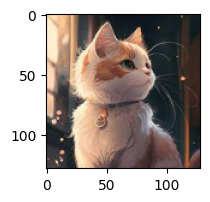

In [65]:
classes = ["cat","dog"]
from PIL import Image
fileImage = Image.open("./anime-cat.png").convert("RGB").resize([img_size[0],img_size[1]])
image = np.array(fileImage)
myimage = image.reshape(1, img_size[0],img_size[1],3)

plt.figure(figsize = (4,2))
plt.imshow(image);

my_predicted_image = model_1.predict(myimage)
# print(my_predicted_image)
if (my_predicted_image < 0.50):
    y_class=0 
else:
    y_class=1
print("class:",y_class,"name=",classes[y_class])